In [1]:
#imports 
import pandas as pd
import numpy as np

import acquire
import prepare

import seaborn as sns
import matplotlib.pyplot as plt 


from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


# Plan

### 1. Do customers with spouses and children churn less than those who do not have any dependents?

   My intial thoughts are that if a customer has children and/or spouses they are less likely to churn because they need<br> internet and tv services to be entertained and be able to work on school activites.


### 2. Does the type of contract a customer have make it more likley to churn?

   My thought is that a month to month type of contract is easier to terminate then a yearly
   or longer type of contract.<br>


### 3. Are customers with DSL more or less likely to churn?

   My intial thought is yes because there are faster internet options in which they can switch
   to.<br>


### 4. Are Senior Citizens more or less likely to churn than a non Senior Citizen?

   The thought process is less because a Senior Citizen could have more diffculty actually 
   knowing the steps to go through<br> and terminate their contract.


# Acquire

In [2]:
# looking at columns of my orginial data set

sample = acquire.get_telco_data()
sample.head()
# sample['contract_type_id'].value_counts()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
# Running my function in acquire.py to get my data

df = acquire.get_telco_data()

# Ran a function to display all the columns of the data frame

pd.options.display.max_columns = None

In [4]:
# looking at the first 5 rows of data 

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [5]:
# looked at dtypes, columns, null count, and column names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
# checking for any nulls

df.isna().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

# Prepare

In [7]:
# Ran my prepare function in my prepare.py to clean my data set

df = prepare.prep_telco(df)

# looking at first 5 rows of data

df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,1,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1


In [8]:
# looked at dtypes, columns, null count, and column names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   gender                                  7043 non-null   object 
 2   senior_citizen                          7043 non-null   int64  
 3   partner                                 7043 non-null   object 
 4   dependents                              7043 non-null   object 
 5   tenure                                  7043 non-null   int64  
 6   phone_service                           7043 non-null   object 
 7   multiple_lines                          7043 non-null   object 
 8   online_security                         7043 non-null   object 
 9   online_backup                           7043 non-null   object 
 10  device_protection                       7043 non-null   obje

In [9]:
# checked rows and columns of data frame

df.shape

(7043, 58)

# Split Data

In [10]:
# Ran my function that split my data into train, validate, and test subsets

col ='churn_encoded'

train, validate, test = prepare.train_val_test(df, col)

train.shape, validate.shape, test.shape

((4930, 58), (2465, 58), (2465, 58))

# Data Exploration 

In [11]:
# made a list for each numerical and categorical columns

num_vars = df.select_dtypes(include = ['float64', 'int64'])
cat_vars = df.select_dtypes(include= ['object', 'uint8'])

In [12]:
# figured out how many each list has

print(num_vars.columns.nunique())
print(cat_vars.columns.nunique())

9
49


In [13]:
# numerical dtype list

num_vars.columns.to_list()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded']

In [14]:
# categorical dtype list 

cat_vars.columns.to_list()

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'intern

customer_id
7901-HXJVA    1
8777-MBMTS    1
8406-LNMHF    1
9435-JMLSX    1
4682-BLBUC    1
             ..
0516-OOHAR    1
8896-BQTTI    1
9693-XMUOB    1
3672-YITQD    1
8003-EWNDZ    1
Name: customer_id, Length: 4930, dtype: int64
7901-HXJVA    0.020284
8777-MBMTS    0.020284
8406-LNMHF    0.020284
9435-JMLSX    0.020284
4682-BLBUC    0.020284
                ...   
0516-OOHAR    0.020284
8896-BQTTI    0.020284
9693-XMUOB    0.020284
3672-YITQD    0.020284
8003-EWNDZ    0.020284
Name: customer_id, Length: 4930, dtype: float64


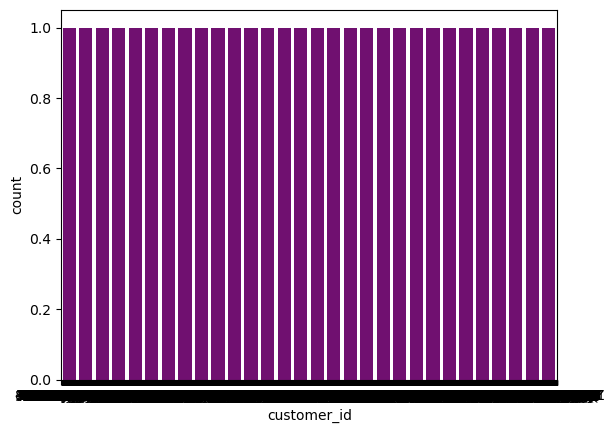

gender
Male      2514
Female    2416
Name: gender, dtype: int64
Male      50.993915
Female    49.006085
Name: gender, dtype: float64


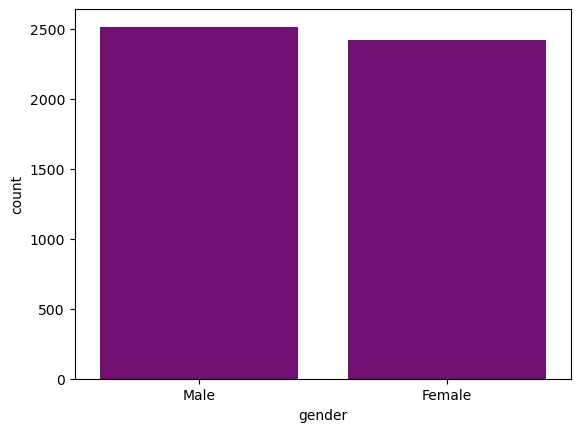

partner
No     2560
Yes    2370
Name: partner, dtype: int64
No     51.926978
Yes    48.073022
Name: partner, dtype: float64


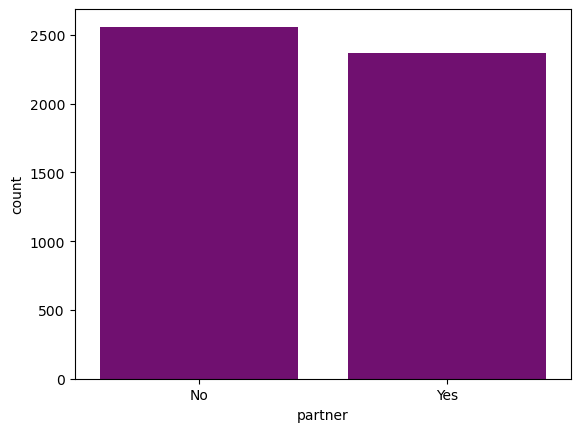

dependents
No     3436
Yes    1494
Name: dependents, dtype: int64
No     69.69574
Yes    30.30426
Name: dependents, dtype: float64


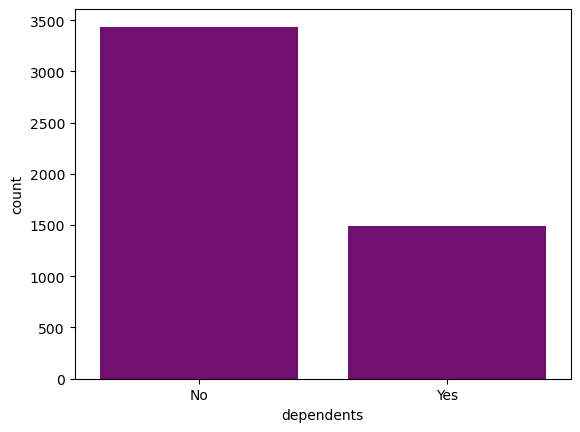

phone_service
Yes    4485
No      445
Name: phone_service, dtype: int64
Yes    90.973631
No      9.026369
Name: phone_service, dtype: float64


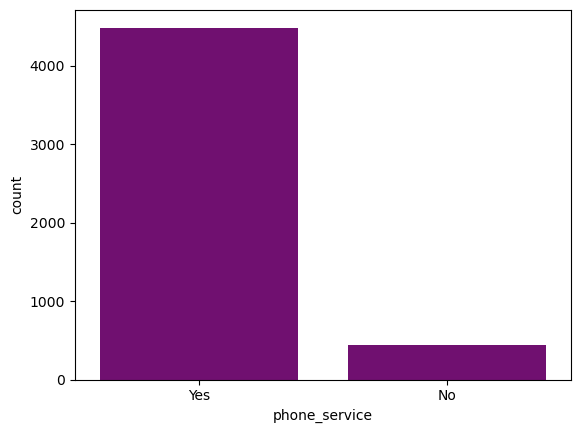

multiple_lines
No                  2397
Yes                 2088
No phone service     445
Name: multiple_lines, dtype: int64
No                  48.620690
Yes                 42.352941
No phone service     9.026369
Name: multiple_lines, dtype: float64


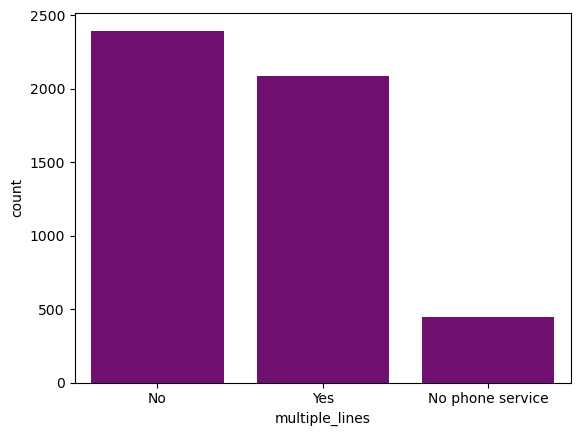

online_security
No                     2459
Yes                    1408
No internet service    1063
Name: online_security, dtype: int64
No                     49.878296
Yes                    28.559838
No internet service    21.561866
Name: online_security, dtype: float64


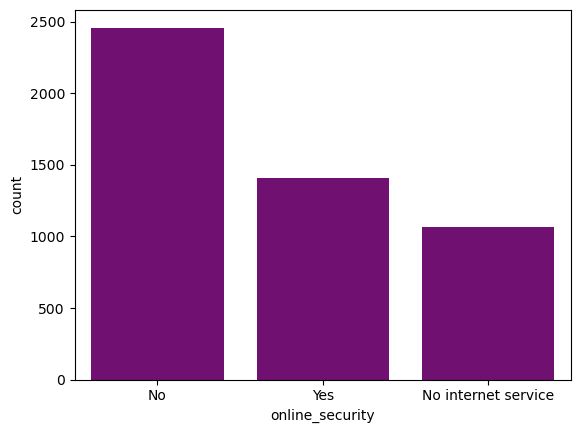

online_backup
No                     2174
Yes                    1693
No internet service    1063
Name: online_backup, dtype: int64
No                     44.097363
Yes                    34.340771
No internet service    21.561866
Name: online_backup, dtype: float64


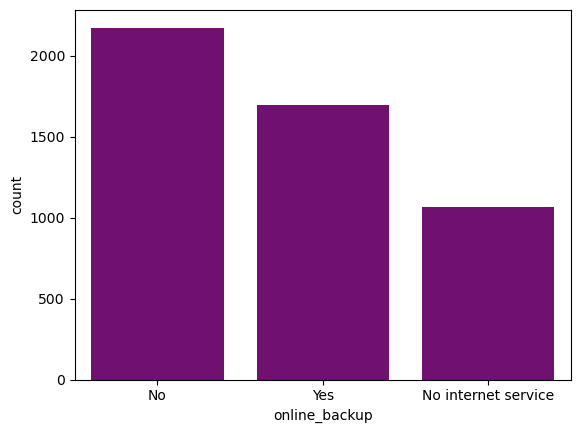

device_protection
No                     2174
Yes                    1693
No internet service    1063
Name: device_protection, dtype: int64
No                     44.097363
Yes                    34.340771
No internet service    21.561866
Name: device_protection, dtype: float64


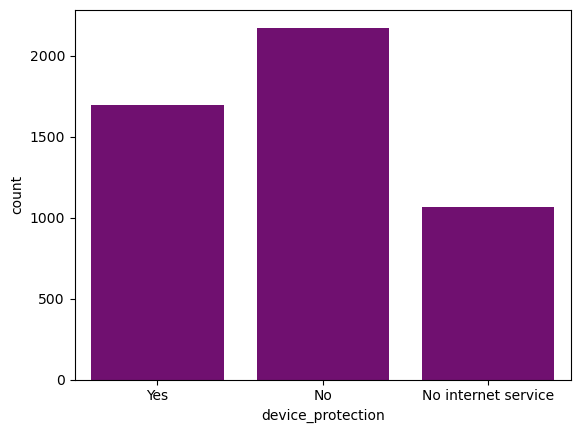

tech_support
No                     2427
Yes                    1440
No internet service    1063
Name: tech_support, dtype: int64
No                     49.229209
Yes                    29.208925
No internet service    21.561866
Name: tech_support, dtype: float64


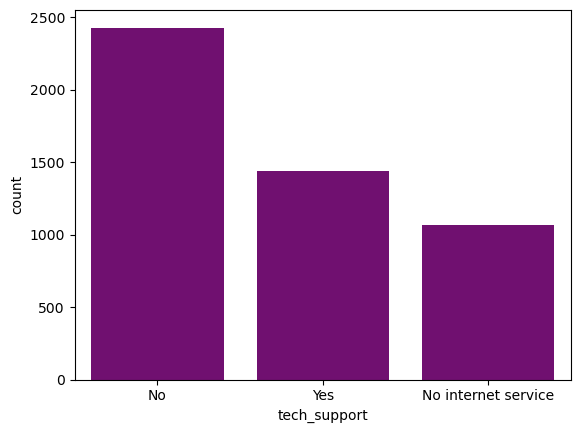

streaming_tv
No                     1964
Yes                    1903
No internet service    1063
Name: streaming_tv, dtype: int64
No                     39.837728
Yes                    38.600406
No internet service    21.561866
Name: streaming_tv, dtype: float64


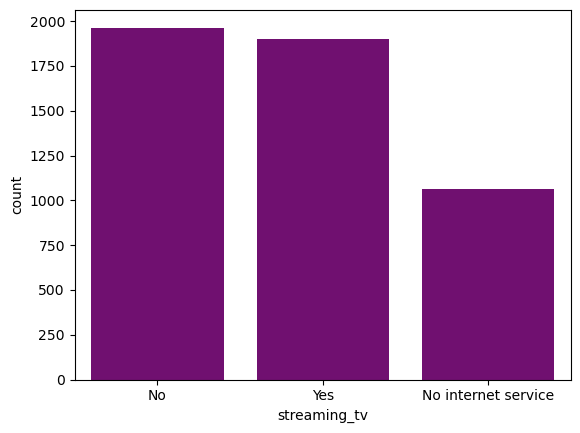

streaming_movies
No                     1943
Yes                    1924
No internet service    1063
Name: streaming_movies, dtype: int64
No                     39.411765
Yes                    39.026369
No internet service    21.561866
Name: streaming_movies, dtype: float64


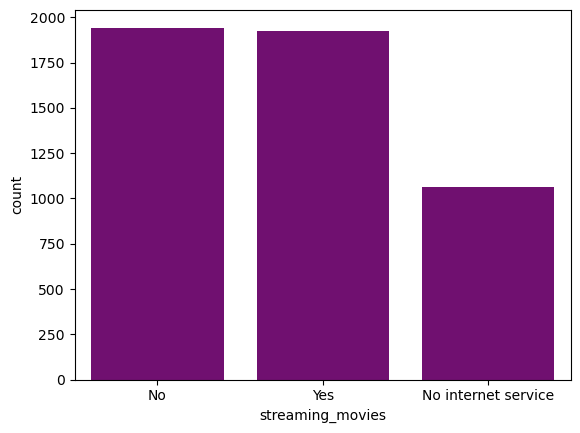

paperless_billing
Yes    2958
No     1972
Name: paperless_billing, dtype: int64
Yes    60.0
No     40.0
Name: paperless_billing, dtype: float64


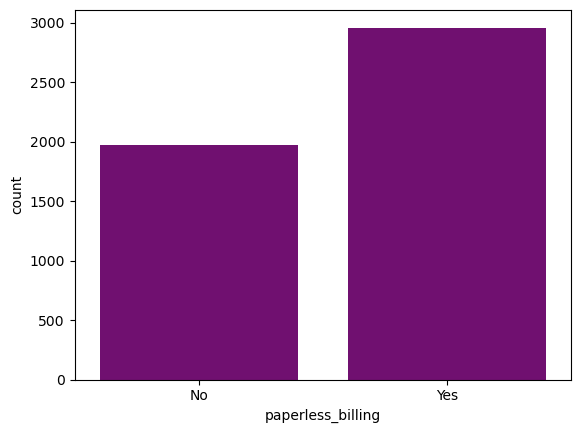

total_charges
           9
19.75      8
20.2       8
19.9       7
45.3       6
          ..
2633.95    1
261.25     1
4738.3     1
854.45     1
222.65     1
Name: total_charges, Length: 4647, dtype: int64
           0.182556
19.75      0.162272
20.2       0.162272
19.9       0.141988
45.3       0.121704
             ...   
2633.95    0.020284
261.25     0.020284
4738.3     0.020284
854.45     0.020284
222.65     0.020284
Name: total_charges, Length: 4647, dtype: float64


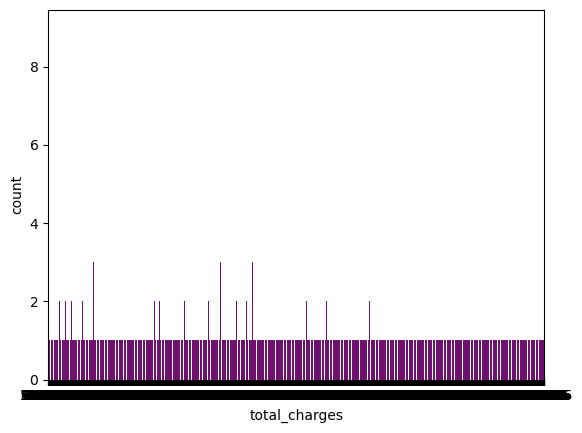

churn
No     3622
Yes    1308
Name: churn, dtype: int64
No     73.46856
Yes    26.53144
Name: churn, dtype: float64


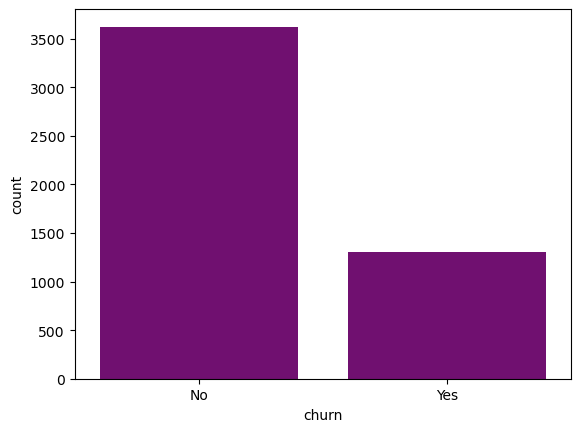

contract_type
Month-to-month    2693
Two year          1190
One year          1047
Name: contract_type, dtype: int64
Month-to-month    54.624746
Two year          24.137931
One year          21.237323
Name: contract_type, dtype: float64


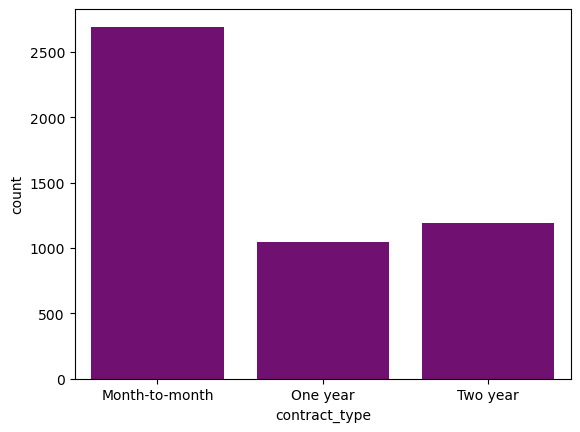

internet_service_type
Fiber optic    2199
DSL            1668
None           1063
Name: internet_service_type, dtype: int64
Fiber optic    44.604462
DSL            33.833671
None           21.561866
Name: internet_service_type, dtype: float64


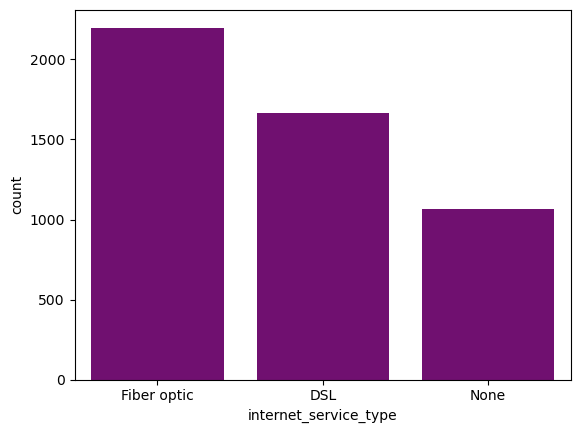

payment_type
Electronic check             1640
Mailed check                 1115
Bank transfer (automatic)    1101
Credit card (automatic)      1074
Name: payment_type, dtype: int64
Electronic check             33.265720
Mailed check                 22.616633
Bank transfer (automatic)    22.332657
Credit card (automatic)      21.784990
Name: payment_type, dtype: float64


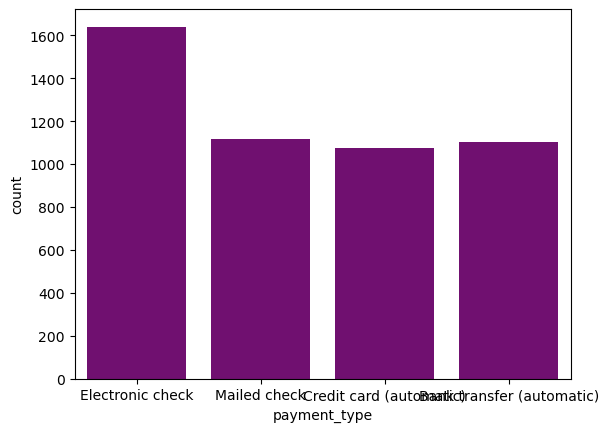

multiple_lines_No
0    2533
1    2397
Name: multiple_lines_No, dtype: int64
0    51.37931
1    48.62069
Name: multiple_lines_No, dtype: float64


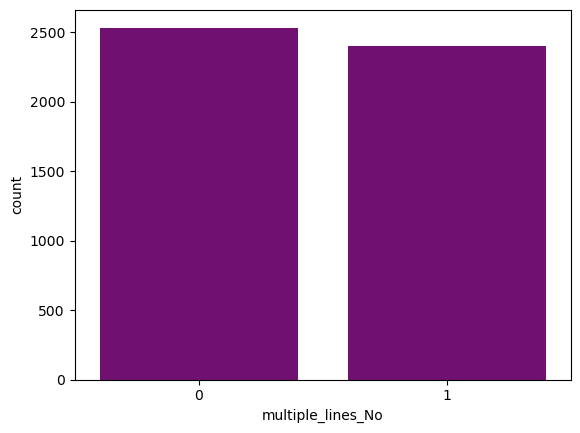

multiple_lines_No phone service
0    4485
1     445
Name: multiple_lines_No phone service, dtype: int64
0    90.973631
1     9.026369
Name: multiple_lines_No phone service, dtype: float64


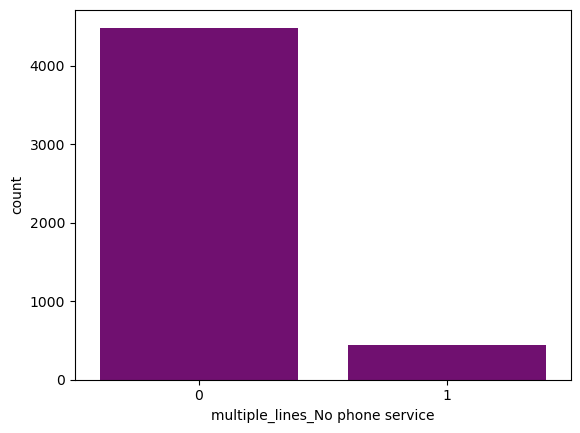

multiple_lines_Yes
0    2842
1    2088
Name: multiple_lines_Yes, dtype: int64
0    57.647059
1    42.352941
Name: multiple_lines_Yes, dtype: float64


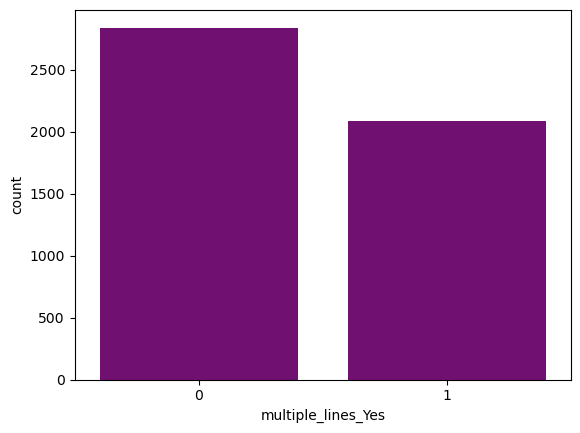

online_security_No
0    2471
1    2459
Name: online_security_No, dtype: int64
0    50.121704
1    49.878296
Name: online_security_No, dtype: float64


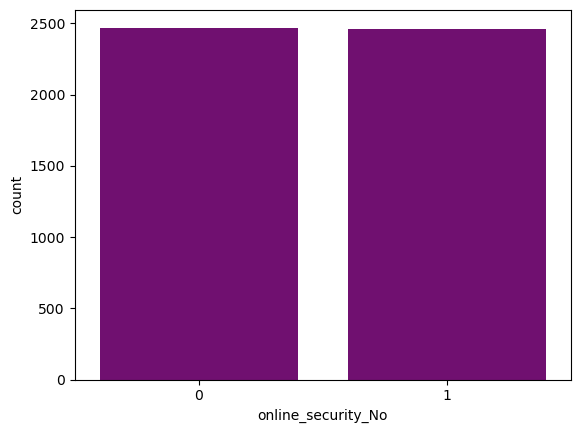

online_security_No internet service
0    3867
1    1063
Name: online_security_No internet service, dtype: int64
0    78.438134
1    21.561866
Name: online_security_No internet service, dtype: float64


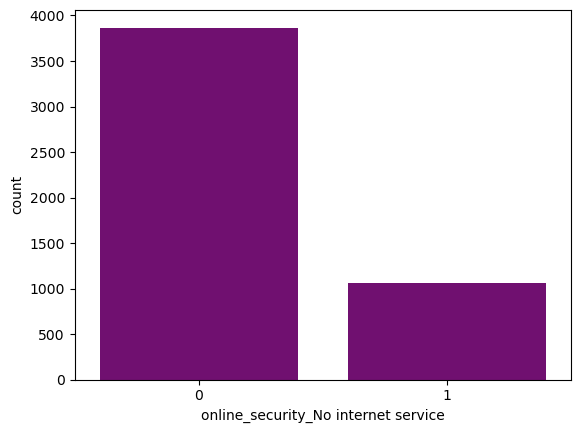

online_security_Yes
0    3522
1    1408
Name: online_security_Yes, dtype: int64
0    71.440162
1    28.559838
Name: online_security_Yes, dtype: float64


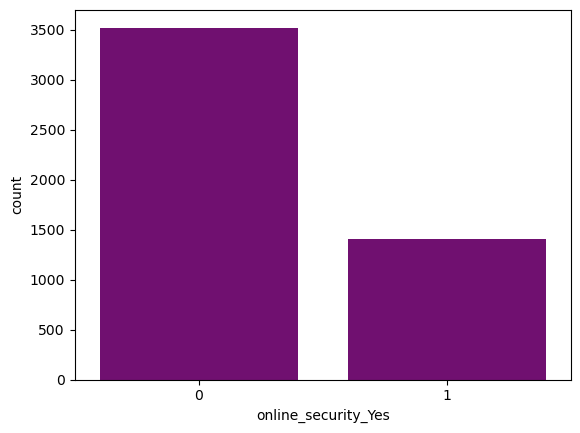

online_backup_No
0    2756
1    2174
Name: online_backup_No, dtype: int64
0    55.902637
1    44.097363
Name: online_backup_No, dtype: float64


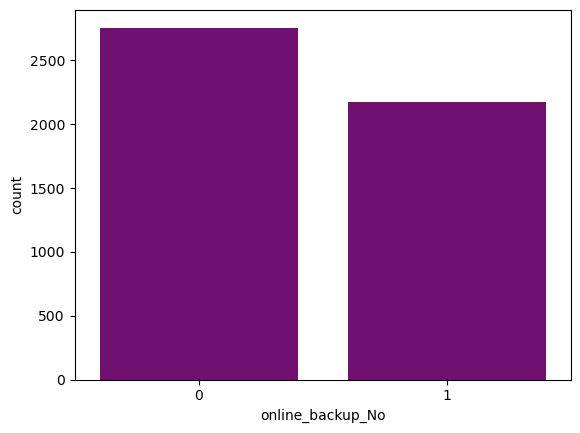

online_backup_No internet service
0    3867
1    1063
Name: online_backup_No internet service, dtype: int64
0    78.438134
1    21.561866
Name: online_backup_No internet service, dtype: float64


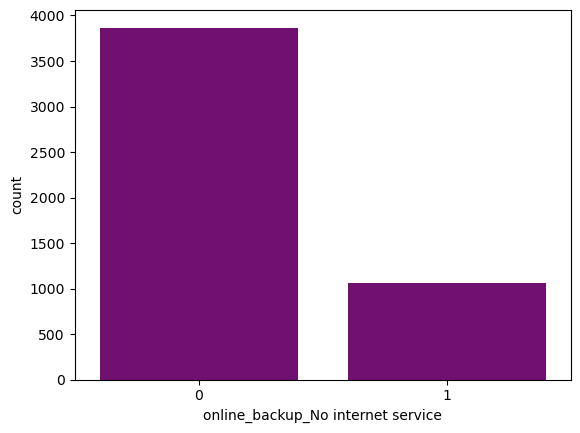

online_backup_Yes
0    3237
1    1693
Name: online_backup_Yes, dtype: int64
0    65.659229
1    34.340771
Name: online_backup_Yes, dtype: float64


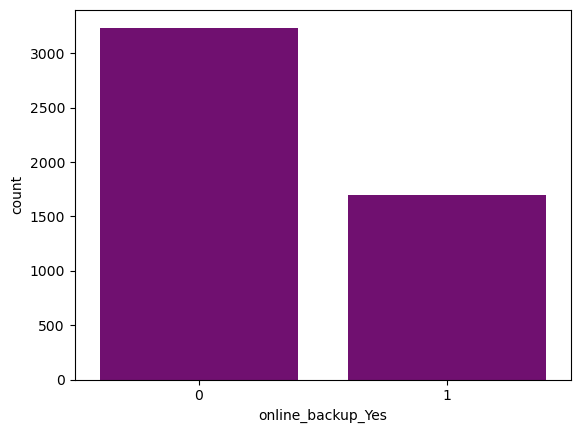

device_protection_No
0    2756
1    2174
Name: device_protection_No, dtype: int64
0    55.902637
1    44.097363
Name: device_protection_No, dtype: float64


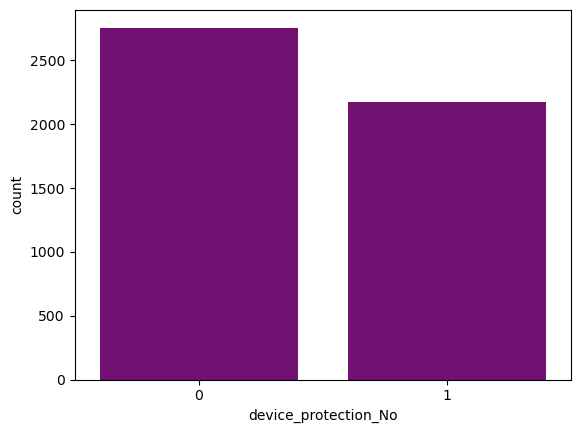

device_protection_No internet service
0    3867
1    1063
Name: device_protection_No internet service, dtype: int64
0    78.438134
1    21.561866
Name: device_protection_No internet service, dtype: float64


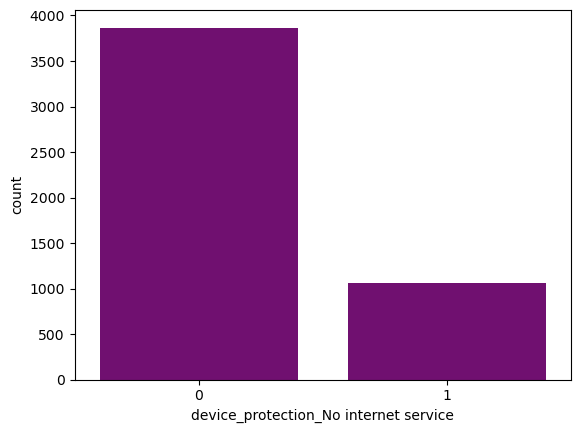

device_protection_Yes
0    3237
1    1693
Name: device_protection_Yes, dtype: int64
0    65.659229
1    34.340771
Name: device_protection_Yes, dtype: float64


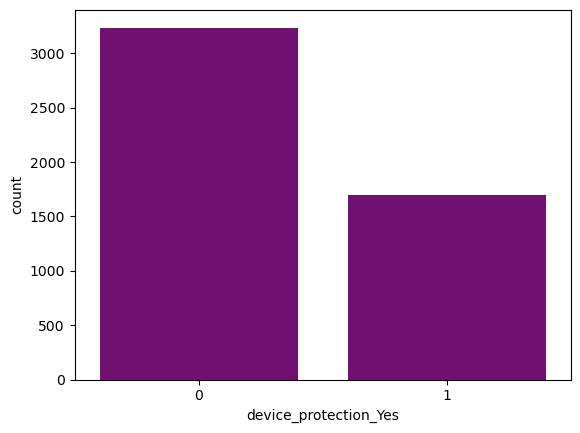

tech_support_No
0    2503
1    2427
Name: tech_support_No, dtype: int64
0    50.770791
1    49.229209
Name: tech_support_No, dtype: float64


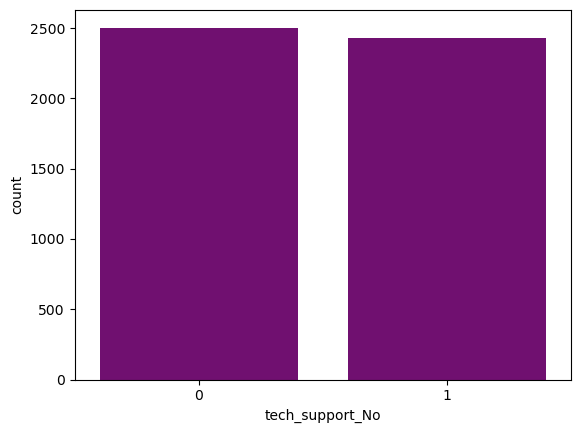

tech_support_No internet service
0    3867
1    1063
Name: tech_support_No internet service, dtype: int64
0    78.438134
1    21.561866
Name: tech_support_No internet service, dtype: float64


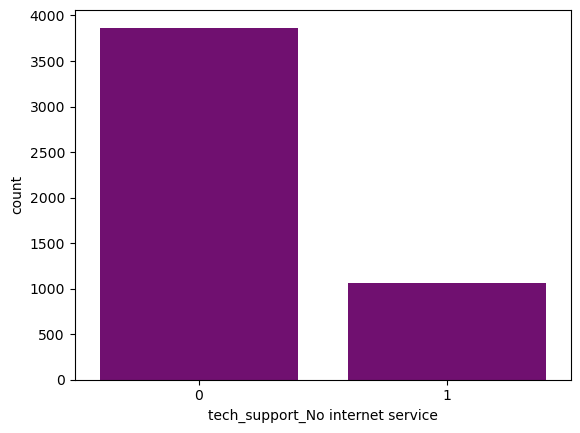

tech_support_Yes
0    3490
1    1440
Name: tech_support_Yes, dtype: int64
0    70.791075
1    29.208925
Name: tech_support_Yes, dtype: float64


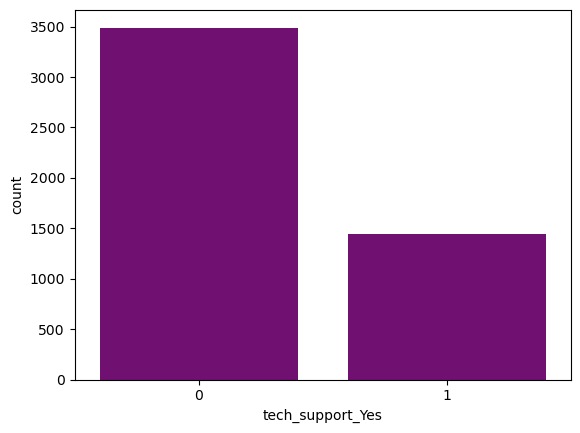

streaming_tv_No
0    2966
1    1964
Name: streaming_tv_No, dtype: int64
0    60.162272
1    39.837728
Name: streaming_tv_No, dtype: float64


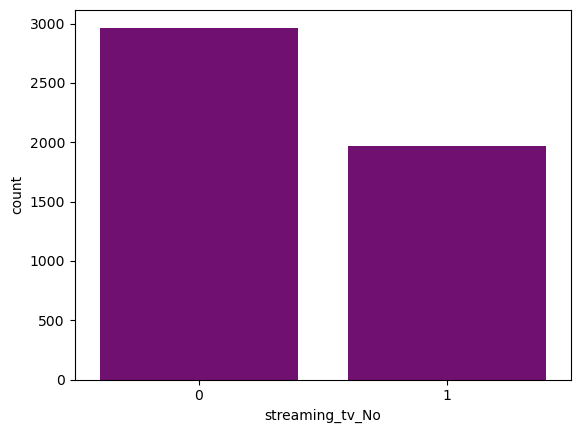

streaming_tv_No internet service
0    3867
1    1063
Name: streaming_tv_No internet service, dtype: int64
0    78.438134
1    21.561866
Name: streaming_tv_No internet service, dtype: float64


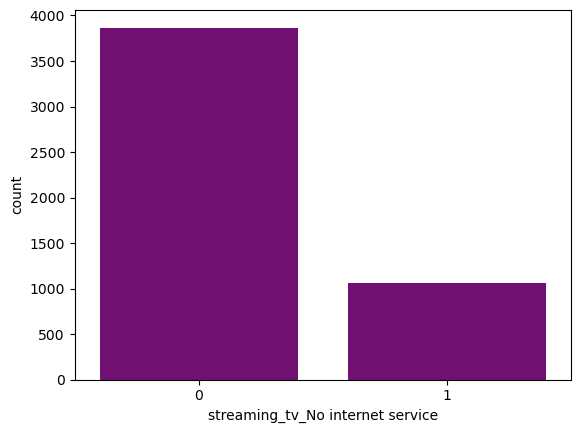

streaming_tv_Yes
0    3027
1    1903
Name: streaming_tv_Yes, dtype: int64
0    61.399594
1    38.600406
Name: streaming_tv_Yes, dtype: float64


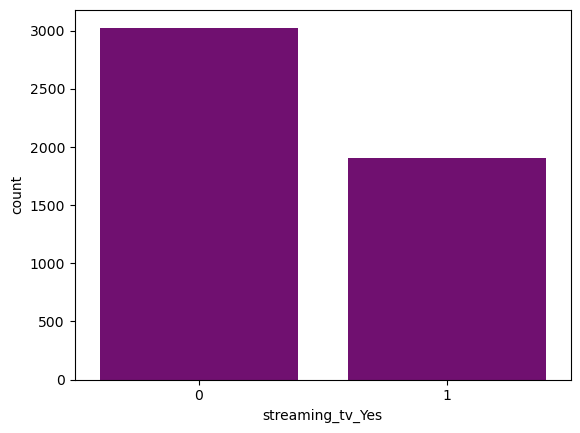

streaming_movies_No
0    2987
1    1943
Name: streaming_movies_No, dtype: int64
0    60.588235
1    39.411765
Name: streaming_movies_No, dtype: float64


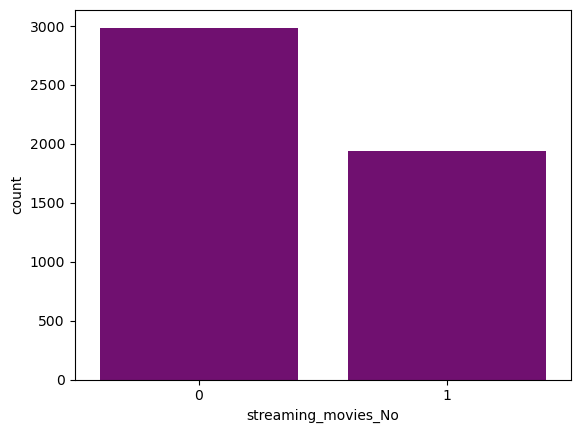

streaming_movies_No internet service
0    3867
1    1063
Name: streaming_movies_No internet service, dtype: int64
0    78.438134
1    21.561866
Name: streaming_movies_No internet service, dtype: float64


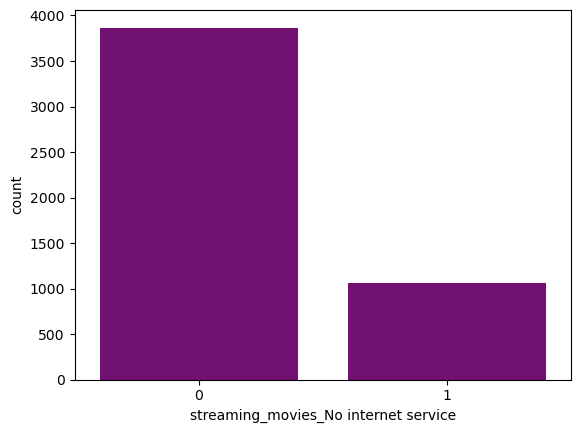

streaming_movies_Yes
0    3006
1    1924
Name: streaming_movies_Yes, dtype: int64
0    60.973631
1    39.026369
Name: streaming_movies_Yes, dtype: float64


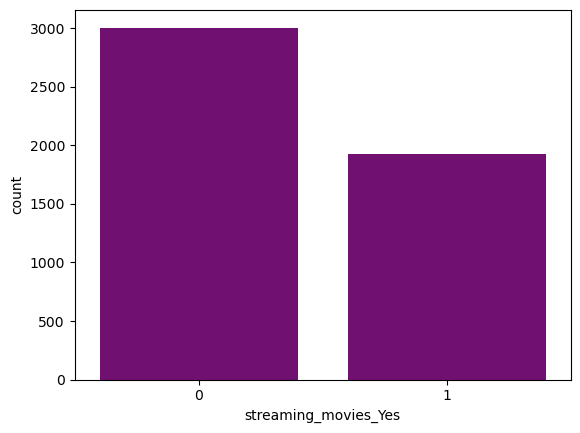

contract_type_Month-to-month
1    2693
0    2237
Name: contract_type_Month-to-month, dtype: int64
1    54.624746
0    45.375254
Name: contract_type_Month-to-month, dtype: float64


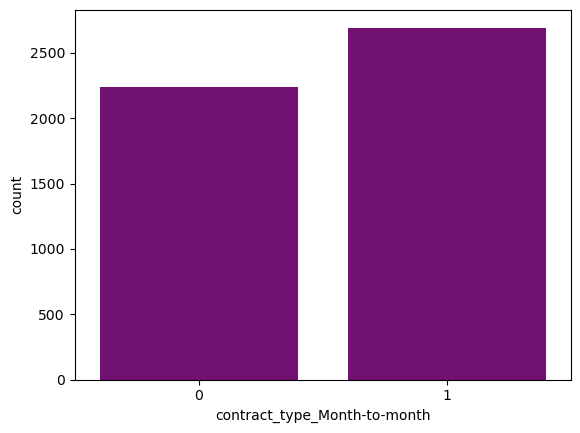

contract_type_One year
0    3883
1    1047
Name: contract_type_One year, dtype: int64
0    78.762677
1    21.237323
Name: contract_type_One year, dtype: float64


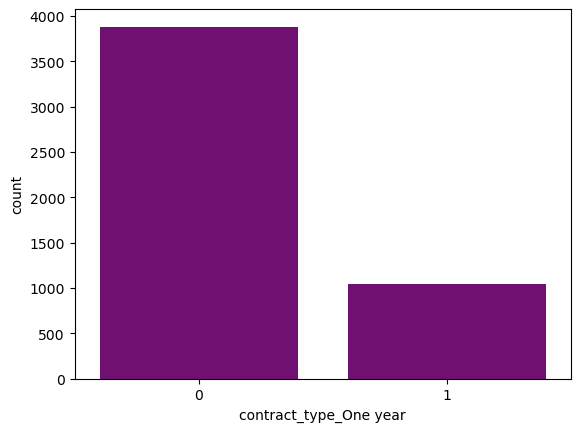

contract_type_Two year
0    3740
1    1190
Name: contract_type_Two year, dtype: int64
0    75.862069
1    24.137931
Name: contract_type_Two year, dtype: float64


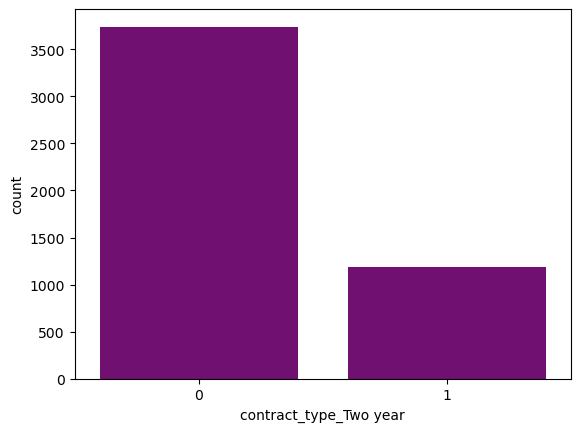

internet_service_type_DSL
0    3262
1    1668
Name: internet_service_type_DSL, dtype: int64
0    66.166329
1    33.833671
Name: internet_service_type_DSL, dtype: float64


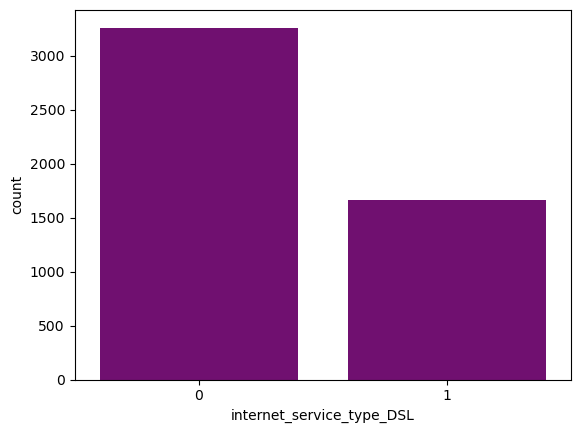

internet_service_type_Fiber optic
0    2731
1    2199
Name: internet_service_type_Fiber optic, dtype: int64
0    55.395538
1    44.604462
Name: internet_service_type_Fiber optic, dtype: float64


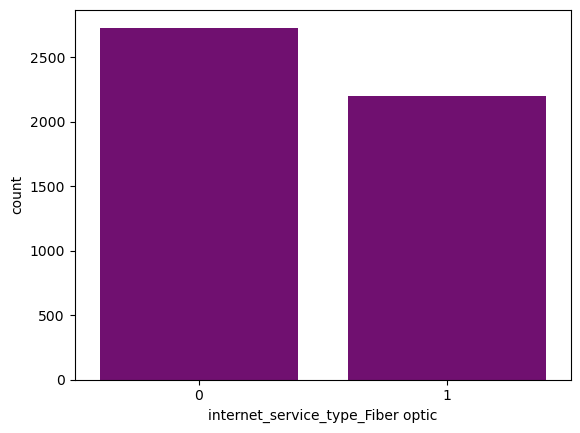

internet_service_type_None
0    3867
1    1063
Name: internet_service_type_None, dtype: int64
0    78.438134
1    21.561866
Name: internet_service_type_None, dtype: float64


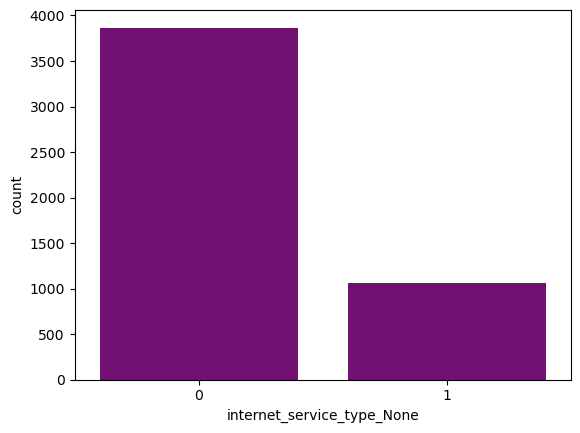

payment_type_Bank transfer (automatic)
0    3829
1    1101
Name: payment_type_Bank transfer (automatic), dtype: int64
0    77.667343
1    22.332657
Name: payment_type_Bank transfer (automatic), dtype: float64


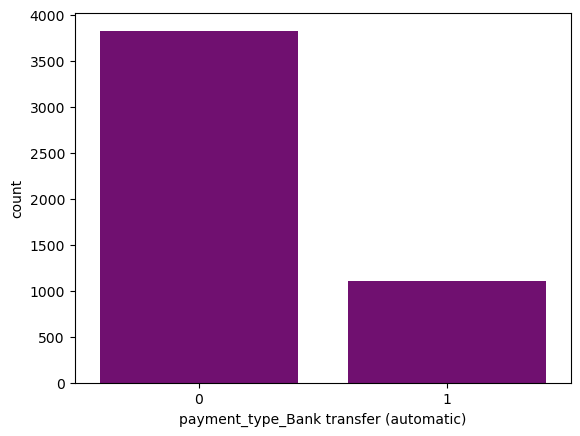

payment_type_Credit card (automatic)
0    3856
1    1074
Name: payment_type_Credit card (automatic), dtype: int64
0    78.21501
1    21.78499
Name: payment_type_Credit card (automatic), dtype: float64


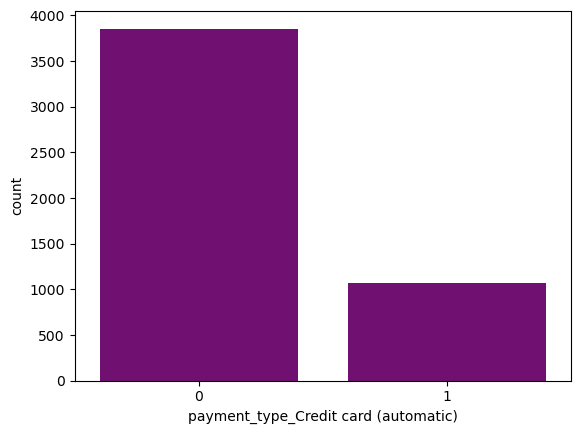

payment_type_Electronic check
0    3290
1    1640
Name: payment_type_Electronic check, dtype: int64
0    66.73428
1    33.26572
Name: payment_type_Electronic check, dtype: float64


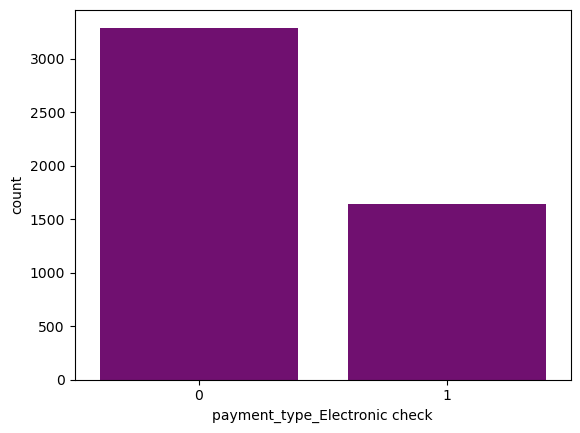

payment_type_Mailed check
0    3815
1    1115
Name: payment_type_Mailed check, dtype: int64
0    77.383367
1    22.616633
Name: payment_type_Mailed check, dtype: float64


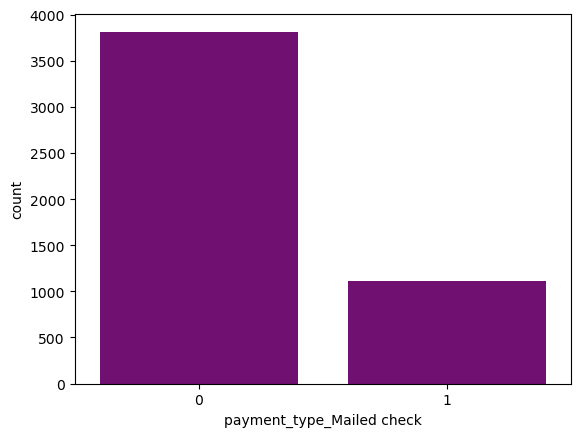

In [15]:
# Made a for loop to run through categorical list to produce a countplot for each column

for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize = True) * 100)
    sns.countplot(x=col, data = train, color = 'purple')
    plt.show() 

senior_citizen


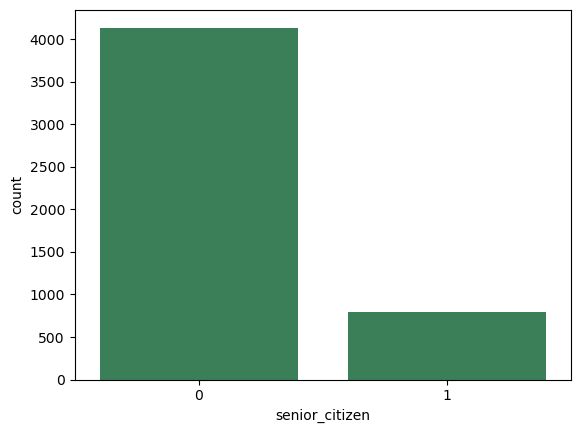

tenure


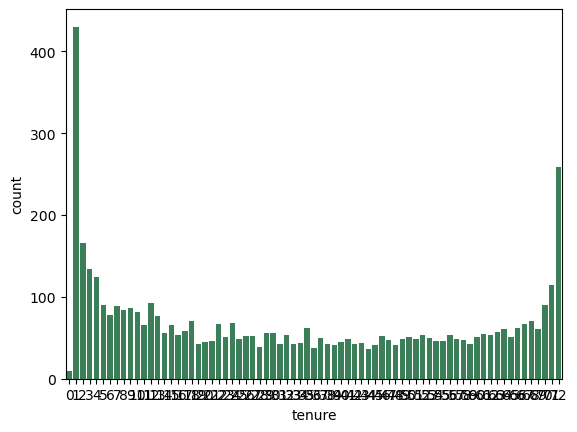

monthly_charges


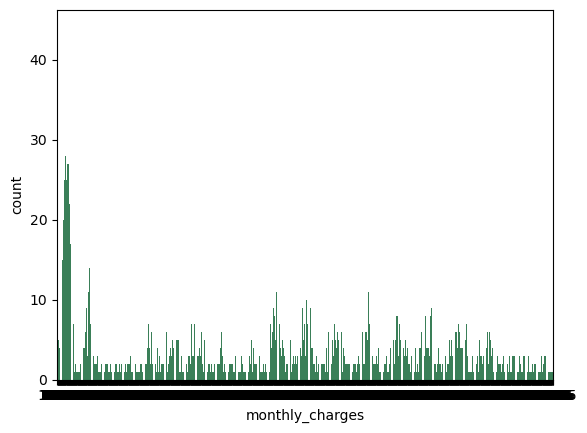

gender_encoded


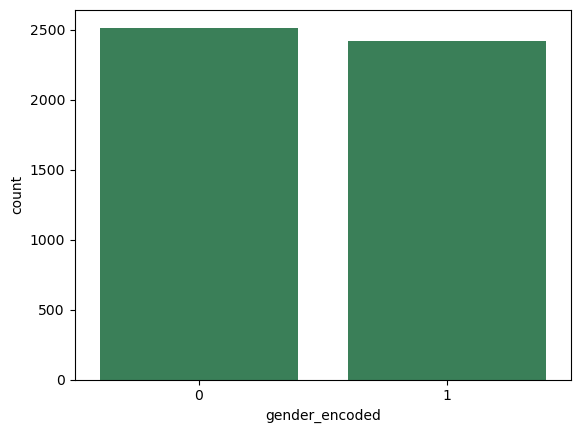

partner_encoded


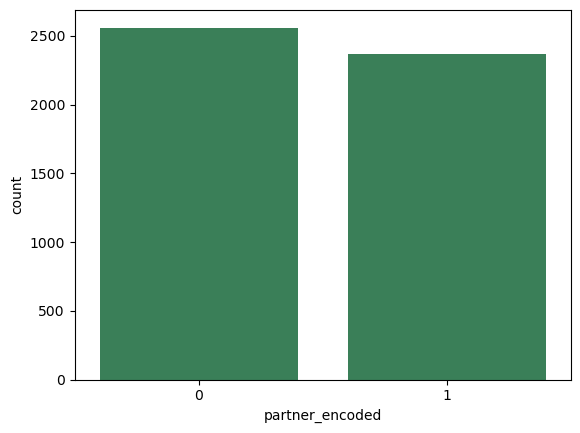

dependents_encoded


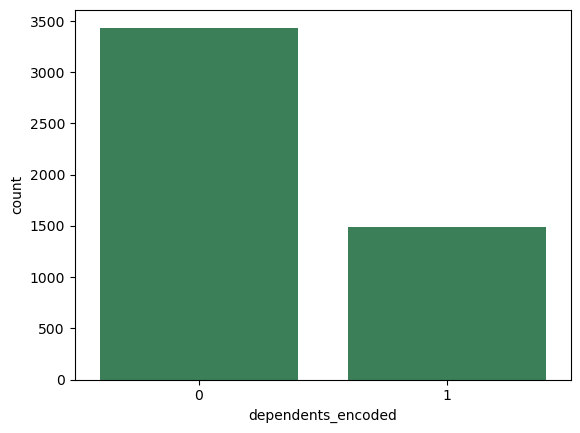

phone_service_encoded


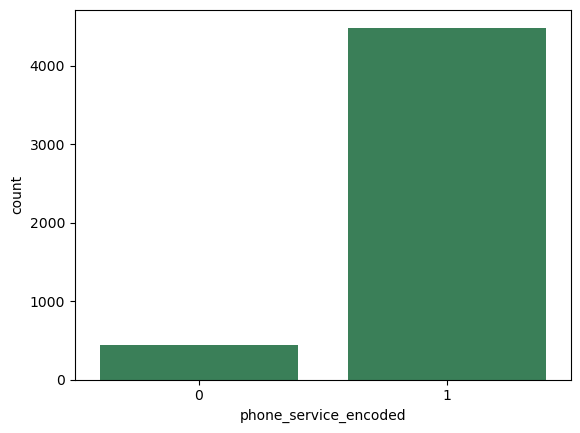

paperless_billing_encoded


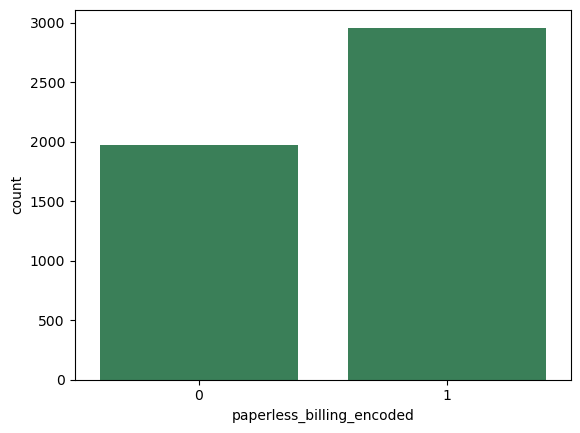

churn_encoded


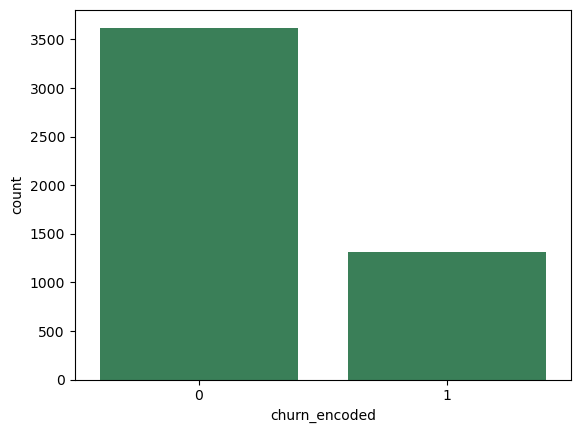

In [16]:
# Made a for loop to run through numerical list to produce a countplot for each column

for col in num_vars:
    print(col)
    sns.countplot(x=col, data = train, color = 'seagreen')
    plt.show()

<AxesSubplot:xlabel='dependents', ylabel='Count'>

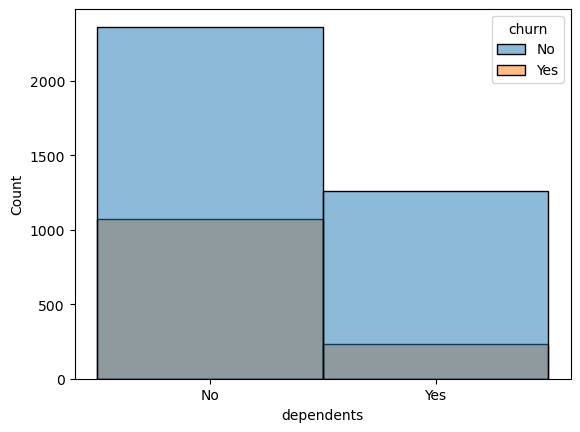

In [17]:
# looked at a basline of how many churned and how many didn't in my train dataset

sns.histplot(x = train['dependents'], data = train, hue = 'churn')

<AxesSubplot:xlabel='dependents', ylabel='count'>

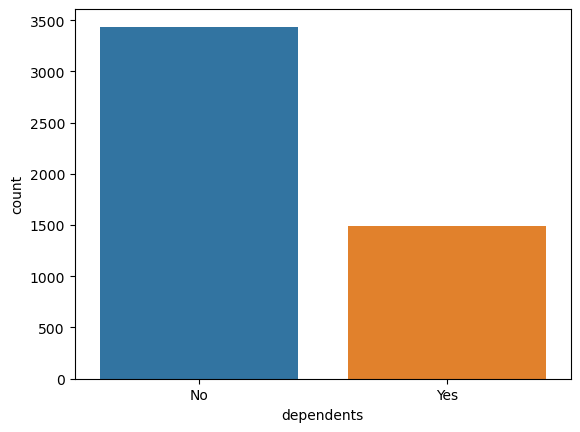

In [18]:
# made a countplot to look at dependents in train dataset

sns.countplot(x = train["dependents"])

In [19]:
# decided it would be easier to make a function that would produce a
# countplot using a for loop to run through my questions and visualize it 

plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133]}


def countplot(x, y, train):
    
    plt.figure(figsize=(10, 7))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        chart = sns.countplot(x=j, hue=x, data=train, alpha=0.75, linewidth=0.5, edgecolor='black', color = 'dodgerblue')
        chart.set_title(j)
        
    return plt.show()

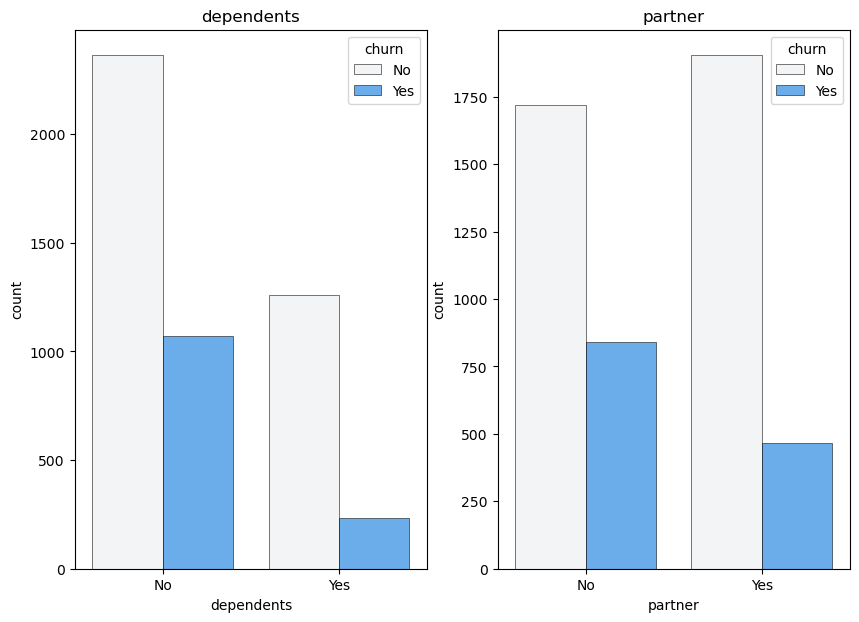

In [20]:
# looking at churned customers who have/ don't have dependents and partners

countplot('churn', ['dependents', 'partner'], train)

**Takeaways** 

 - Seems like churn goes down if you do have dependents and/or a partner
 - Their seems to be a bigger difference if you have dependents than a partner 

In [21]:
# looked at value counts of the different contract types

train['contract_type'].value_counts()

Month-to-month    2693
Two year          1190
One year          1047
Name: contract_type, dtype: int64

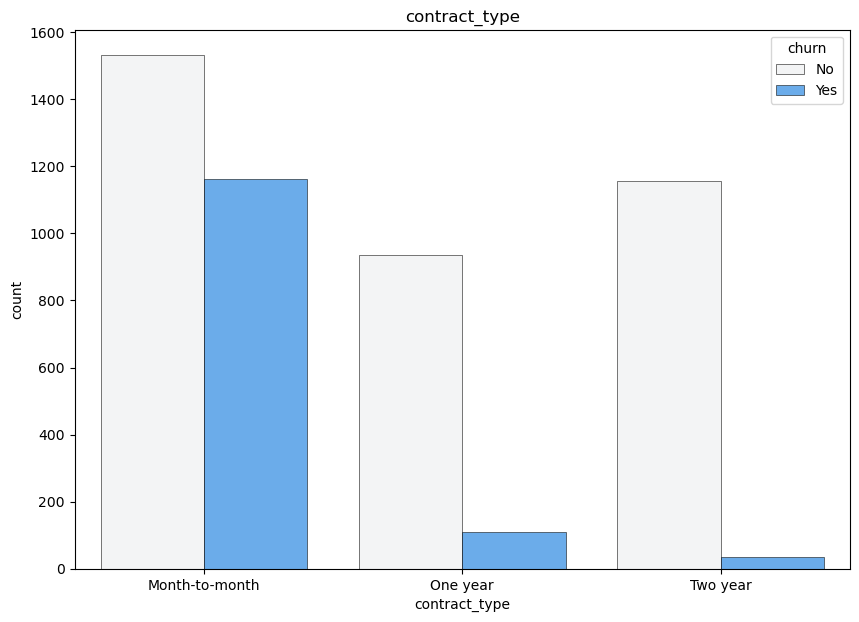

In [22]:
# looking at churned customers who have different type of contract types

countplot('churn', ['contract_type'], train)

**Takeaways**

 - As my intial thoughts it seems like the longer contract you have the less churn there will be observing this chart

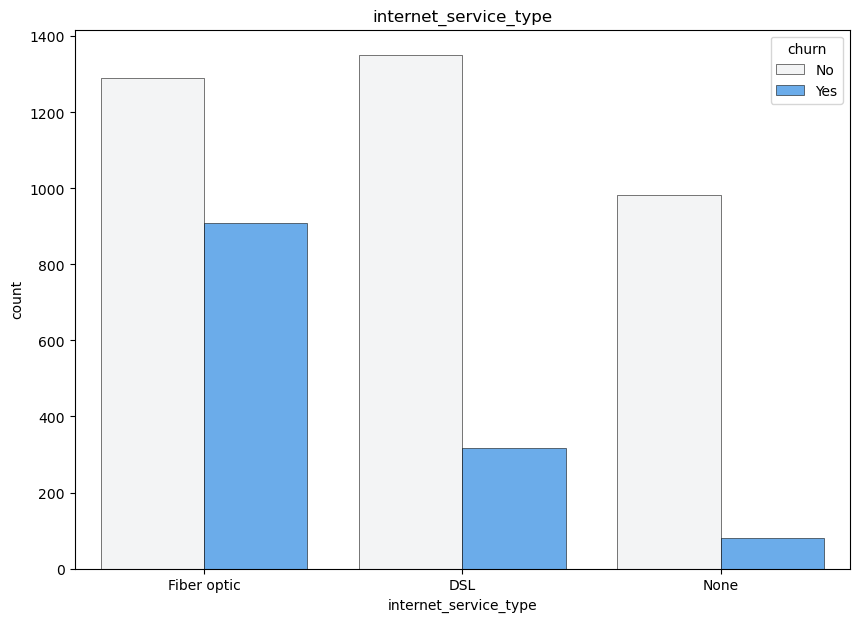

In [23]:
# looking at churned customers who have different type of internet service types

countplot('churn', ['internet_service_type'], train)

**Takeaways**
 
 - It seems like those who are churning more are within the Fiber optic category compared to the other 2 categories.

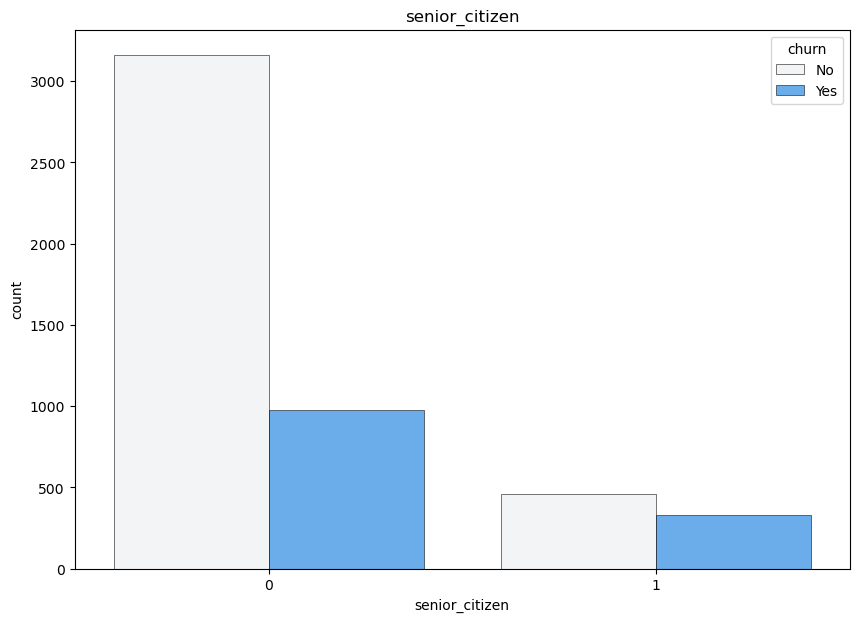

In [24]:
# looking at churned customers who are senior citizens and non citizens

countplot('churn', ['senior_citizen'], train)

**Takeaways** 

 - It seems like non senior citizens are churning less than those who are senior citizens.
--------------------------------------------------------------------------------------

## 1. Do customers with spouses and children churn less than those who do not have any dependents?


### Partner/Dependent

$H_0$: Churn is not dependent on whether a customer has a dependent or partner. <br>
$H_a$: Churn is dependent on whether a customer has a dependent or partner.

In [25]:
# made my null and alternative hypothesis, then made a crosstab of my observed data of partner and churn 

partner_observed = pd.crosstab(train.partner, train.churn_encoded)
partner_observed

churn_encoded,0,1
partner,,
No,1719,841
Yes,1903,467


In [26]:
# performed a chi test on my observed data 
# set alpha to .05
# printed my results of observed, expected, chi², and p value 

chi2, p, degf, expected = stats.chi2_contingency(partner_observed)

𝜶 = .05

#output values
print('Observed:')
print(partner_observed.values)
print('\nExpected:')
print(expected.astype(int))
print('\n---------------')
print(f'chi² = {chi2:.4f}')
print(f'p = {p:.3}')

Observed:
[[1719  841]
 [1903  467]]

Expected:
[[1880  679]
 [1741  628]]

---------------
chi² = 108.4523
p = 2.14e-25


In [27]:
# checked if the p-value is less than alpha to see if either we reject or fail to reject the null hypothesis

if p < 𝜶:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


In [28]:
# made my null and alternative hypothesis, then made a crosstab of my observed data of dependents and churn 

dependents_observed = pd.crosstab(train.dependents, train.churn_encoded)
dependents_observed

churn_encoded,0,1
dependents,,
No,2363,1073
Yes,1259,235


In [29]:
# performed a chi test on my observed data 
# set alpha to .05
# printed my results of observed, expected, chi², and p value

chi2, p, degf, expected = stats.chi2_contingency(dependents_observed)

𝜶 = .05

#output values
print('Observed:')
print(dependents_observed.values)
print('\nExpected:')
print(expected.astype(int))
print('\n----------------')
print(f'chi^2 = {chi2:.4f}')
print(f'p = {p:.3}')

Observed:
[[2363 1073]
 [1259  235]]

Expected:
[[2524  911]
 [1097  396]]

----------------
chi^2 = 127.5215
p = 1.43e-29


In [30]:
# checked if the p-value is less than alpha to see if either we reject or fail to reject the null hypothesis

if p < 𝜶:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


**Takeaways**
 
 - Both partner and dependents reject the null hypothesis, meaning churn does depend on whether a customer has a partner and/or dependents. 
 
--------------------------------------------------------

## 2. Does the type of contract a customer have make it more likley to churn?

### Contract Type

$H_0$: Churn is not dependent on the customers contract type. <br>
$H_a$: Churn is dependent on the customers contract type.

In [31]:
# made my null and alternative hypothesis, then made a crosstab of my observed data of contract type and churn 

contract_type_observed = pd.crosstab(train.contract_type, train.churn_encoded)
contract_type_observed

churn_encoded,0,1
contract_type,,
Month-to-month,1531,1162
One year,936,111
Two year,1155,35


In [32]:
# performed a chi test on my observed data 
# set alpha to .05
# printed my results of observed, expected, chi², and p value

chi2, p, degf, expected = stats.chi2_contingency(contract_type_observed)

𝜶 = .05

#output values
print('Observed:')
print(contract_type_observed.values)
print('\nExpected:')
print(expected.astype(int))
print('\n-------------')
print(f'chi² = {chi2:.4}')
print(f'p = {p:.3}')

Observed:
[[1531 1162]
 [ 936  111]
 [1155   35]]

Expected:
[[1978  714]
 [ 769  277]
 [ 874  315]]

-------------
chi² = 857.6
p = 6.09e-187


In [33]:
# checked if the p-value is less than alpha to see if either we reject or fail to reject the null hypothesis

if p < 𝜶:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


**Takeaways**

 - According to our statistical test churn does depend on the contract type that our customer has.
 - It seems like the a customer on a month to month type of contract has the highest churn rate than the other 2 contracts
 
 ---------------------------------------------------------------

## 3. Are customers with DSL more or less likely to churn?


### Internet Service Type

$H_0$: Churn is not dependent on the type of internet service. <br>
$H_a$: Churn is dependent on the type of internet service.


In [34]:
# made my null and alternative hypothesis, then made a crosstab of my observed data of 
# internet service type and churn 

internet_type_observed = pd.crosstab(train.internet_service_type, train.churn_encoded)
internet_type_observed

churn_encoded,0,1
internet_service_type,,
DSL,1350,318
Fiber optic,1290,909
None,982,81


In [35]:
# performed a chi test on my observed data 
# set alpha to .05
# printed my results of observed, expected, chi², and p value

chi2, p, degf, expected = stats.chi2_contingency(internet_type_observed)

𝜶 = .05

#output values
print('Observed')
print(internet_type_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n---------')
print(f'chi² = {chi2:.4}')
print(f'p = {p:.3}')

Observed
[[1350  318]
 [1290  909]
 [ 982   81]]

Expected
[[1225  442]
 [1615  583]
 [ 780  282]]

---------
chi² = 490.0
p = 3.88e-107


In [36]:
# checked if the p-value is less than alpha to see if either we reject or fail to reject the null hypothesis

if p < 𝜶:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


**Takeaways**

- We reject the null hypthesis, meaning that churn is dependent on the type of internet service type. 
- Fiber optic seems to have the highest churn rate

----------------------------------------------------

## 4. Are Senior Citizens more or less likely to churn than a non Senior Citizen?


## Senior Citizen

$H_0$: Churn is not dependent on whether a customer is a senior citizen. <br>
$H_a$: Churn is dependent on whether a customer is a senior citizen.


In [37]:
# made my null and alternative hypothesis, then made a crosstab of my observed data of senior citizen and churn 

senior_citizen_observed = pd.crosstab(train.senior_citizen, train.churn_encoded)
senior_citizen_observed

churn_encoded,0,1
senior_citizen,,
0,3160,977
1,462,331


In [38]:
# performed a chi test on my observed data 
# set alpha to .05
# printed my results of observed, expected, chi², and p value

chi2, p, degf, expected = stats.chi2_contingency(senior_citizen_observed)

𝜶 = .05

#output values
print('Observed')
print(senior_citizen_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n------------')
print(f'chi² = {chi2:.4}')
print(f'p = {p:.3}')

Observed
[[3160  977]
 [ 462  331]]

Expected
[[3039 1097]
 [ 582  210]]

------------
chi² = 111.2
p = 5.32e-26


In [39]:
# checked if the p-value is less than alpha to see if either we reject or fail to reject the null hypothesis

if p < 𝜶:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


**Takeaways**

 - According to our statistical test churn does depend whether or not you are a senior citizen. 
 - It seems like if you are a senior citizen you are more likely to churn.
 
 ------------------------

# Modeling

In [40]:
# Establish my baseline and print it
baseline_accuracy = (train['churn_encoded'] == 0).mean()
print(f'The baseline accuracy is {baseline_accuracy * 100:.2f}%')

The baseline accuracy is 73.47%


In [41]:
# took a look at what columns I could drop to rerun my model to improve accuracy

s = train.drop(columns = ['payment_type', 'internet_service_type',
                      'contract_type', 'churn',
                      'paperless_billing', 'streaming_movies',
                      'streaming_tv', 'tech_support',
                      'device_protection', 'online_backup',
                      'online_security', 'multiple_lines',
                      'phone_service', 'dependents',
                      'partner', 'gender', 'customer_id'
                        ]
              )
               
    
s    

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5609,0,14,76.45,1117.55,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2209,0,5,70.00,347.4,0,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1
6919,0,35,75.20,2576.2,0,1,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2284,0,58,86.10,4890.5,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
845,0,2,49.60,114.7,1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0,40,81.20,3292.3,0,1,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1501,0,52,24.55,1331.05,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
6331,0,22,20.75,452.35,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
2739,0,24,24.70,571.75,1,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [42]:
# made a list of the columns within my df assigned as s

s.columns.to_list()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank tr

In [43]:
# my 1st split data into subsets of X/y train, validate, and test

#features = ['partner_encoded', 'dependents_encoded',
#'internet_service_type_DSL', 'internet_service_type_Fiber optic',
#'internet_service_type_None', 'senior_citizen',
#'contract_type_Month-to-month', 'contract_type_One year',
#'contract_type_Two year']

#X_train = train[features]
#y_train = train.churn_encoded

#X_val = validate[features]
#y_val = validate.churn_encoded

#X_test = test[features]
#y_test = test.churn_encoded

In [44]:
# created my 2nd X & y subset data of train, validate, and test. 
# Where my y is the target variable and X are all the features with some dropped columns. 

X_train = train.drop(columns = ['payment_type', 'internet_service_type',
                      'contract_type', 'churn',
                      'paperless_billing', 'streaming_movies',
                      'streaming_tv', 'tech_support',
                      'device_protection', 'online_backup',
                      'online_security', 'multiple_lines',
                      'phone_service', 'dependents',
                      'partner', 'gender', 'customer_id',
                      'churn_encoded', 'total_charges'         
                        ]
                    )
y_train = train.churn_encoded

X_val = validate.drop(columns = ['payment_type', 'internet_service_type',
                      'contract_type', 'churn',
                      'paperless_billing', 'streaming_movies',
                      'streaming_tv', 'tech_support',
                      'device_protection', 'online_backup',
                      'online_security', 'multiple_lines',
                      'phone_service', 'dependents',
                      'partner', 'gender', 'customer_id',
                      'churn_encoded', 'total_charges'         
                        ]
                      )
y_val = validate.churn_encoded

X_test = test.drop(columns = ['payment_type', 'internet_service_type',
                      'contract_type', 'churn',
                      'paperless_billing', 'streaming_movies',
                      'streaming_tv', 'tech_support',
                      'device_protection', 'online_backup',
                      'online_security', 'multiple_lines',
                      'phone_service', 'dependents',
                      'partner', 'gender', 'customer_id',
                      'churn_encoded', 'total_charges'          
                        ]
                  )
y_test = test.churn_encoded

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 5609 to 5679
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          4930 non-null   int64  
 1   tenure                                  4930 non-null   int64  
 2   monthly_charges                         4930 non-null   float64
 3   gender_encoded                          4930 non-null   int64  
 4   partner_encoded                         4930 non-null   int64  
 5   dependents_encoded                      4930 non-null   int64  
 6   phone_service_encoded                   4930 non-null   int64  
 7   paperless_billing_encoded               4930 non-null   int64  
 8   multiple_lines_No                       4930 non-null   uint8  
 9   multiple_lines_No phone service         4930 non-null   uint8  
 10  multiple_lines_Yes                      4930 non-null   u

###  Decision Tree Models

In [46]:
# made a for loop to make the model, fit the model, 
# run the model(using in/out of sample accuracy) and evaluate the model to run through different max depths


metrics = []

for i in range(2,11):
    
    clf = DecisionTreeClassifier(max_depth = i, random_state = 42)
    
    clf.fit(X_train, y_train)
    
    in_sample_accuracy = clf.score(X_train, y_train)
    
    out_of_sample_accuracy = clf.score(X_val, y_val)

    output = {
            'max_depth' : i,
            'train_accuracy': in_sample_accuracy,
            'validate_accuracy': out_of_sample_accuracy
             }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values('difference')

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.762475,0.763083,-0.000609
7,9,0.857201,0.855984,0.001217
2,4,0.798580,0.795538,0.003043
3,5,0.805071,0.801623,0.003448
6,8,0.837525,0.833671,0.003854
8,10,0.874645,0.870588,0.004057
1,3,0.792292,0.787830,0.004462
4,6,0.816227,0.811765,0.004462
5,7,0.827383,0.822312,0.005071


**Takeaways** 

- The decision tree model with the best difference between train and validate accuracy is between depths of 2 and 3
- I would say the best depth to go with would be 9

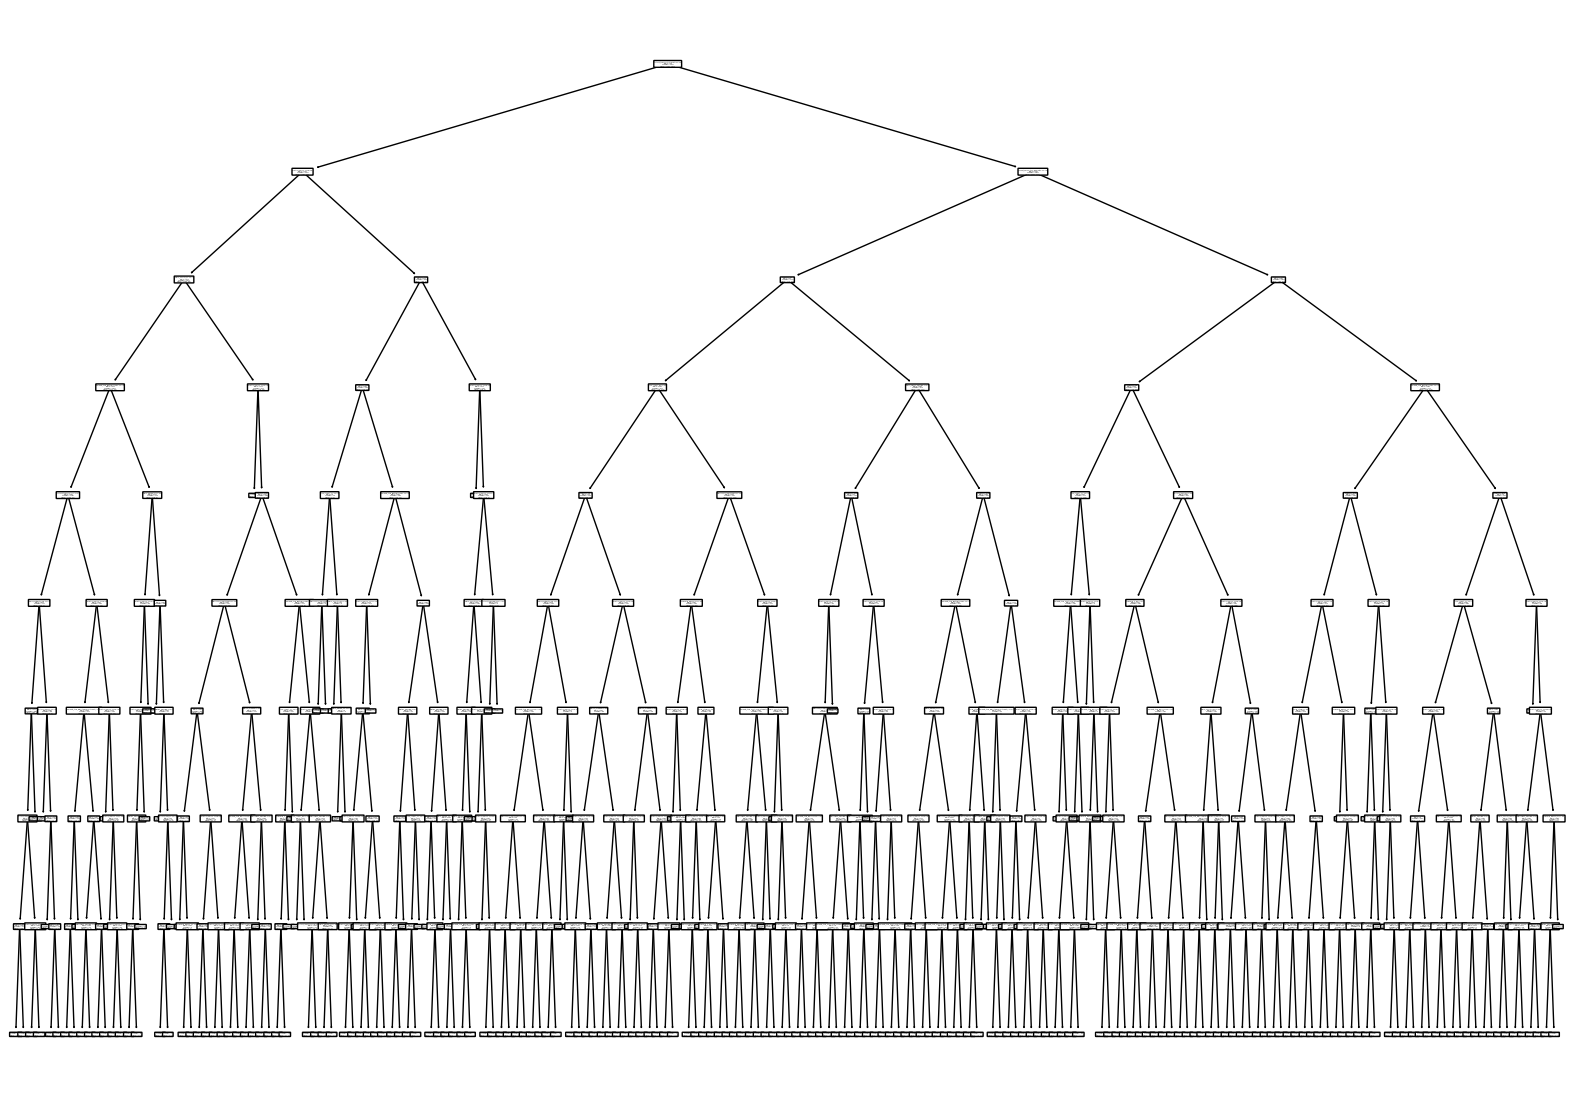

In [64]:
# plotted the best modeled decision tree with max depth of 9

clf = DecisionTreeClassifier(max_depth = 9, random_state = 42)
clf = clf.fit(X_train,y_train)
plt.figure(figsize=(20, 14))
plot_tree(clf, feature_names=X_train.columns, rounded=True)
plt.show()

### Random Forest Models

In [48]:
# made a for loop to make the model, fit the model, 
# ran the model(using in/out of sample accuracy) and evaluate the model
# to run through different depths of min_samples and max_depth

metrics = []
max_depth = 11

for i in range(1, max_depth):
   
    depth = max_depth - i
    n_samples = i
    rf = RandomForestClassifier(max_depth = depth, min_samples_leaf = n_samples,
                                random_state = 22, n_estimators = 200)

    rf = rf.fit(X_train, y_train)
    
    in_sample_accuracy = rf.score(X_train, y_train)
    
    out_of_sample_accuracy = rf.score(X_val, y_val)

    output = {
            'min_samples_per_leaf': n_samples,
            'max_depth': depth,
            'train_accuracy': in_sample_accuracy,
            'validate_accuracy': out_of_sample_accuracy
            }
    
    metrics.append(output)
    
rf = pd.DataFrame(metrics)
rf["difference"] = rf.train_accuracy - rf.validate_accuracy
rf.sort_values(by=['difference'])

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
2,3,8,0.830426,0.830832,-0.000406
8,9,2,0.734686,0.734686,0.000000
9,10,1,0.734686,0.734686,0.000000
1,2,9,0.846450,0.845842,0.000609
3,4,7,0.820487,0.819878,0.000609
6,7,4,0.798174,0.797566,0.000609
0,1,10,0.874848,0.873834,0.001014
4,5,6,0.811968,0.810548,0.001420
7,8,3,0.788844,0.787018,0.001826
5,6,5,0.804665,0.802028,0.002637


**Takeaways**

- seems like min sample 2 and max depth 9 is the best model

### KNN Models

In [49]:
# made a for loop to make the model, fit the model, 
# run the model and evaluate the model to run through different neighbors

models_accuracy = []

for i in range(1,21):

    knn = KNeighborsClassifier(n_neighbors = i)
    
    knn = knn.fit(X_train, y_train)
    
    accuracy = knn.score(X_train, y_train)
    accuracy_val = knn.score(X_val, y_val)
    difference = accuracy - accuracy_val
    models_accuracy.append([i, accuracy, accuracy_val, difference])
    
knn_metrics = pd.DataFrame(models_accuracy, columns =['neighbors', 'train_accuracy', 'validate_accuracy','difference'])
knn_metrics.sort_values(by=['difference'])

,neighbors,train_accuracy,validate_accuracy,difference
7,8,0.822921,0.825558,-0.002637
9,10,0.821298,0.823529,-0.002231
10,11,0.821095,0.821095,0.000000
0,1,0.997160,0.997160,0.000000
1,2,0.870588,0.870588,0.000000
8,9,0.818864,0.818256,0.000609
11,12,0.820284,0.819473,0.000811
6,7,0.821907,0.821095,0.000811
5,6,0.830223,0.827181,0.003043
3,4,0.844422,0.840568,0.003854


**Takeaways**

- It seems like 11 neighbors is the best model.

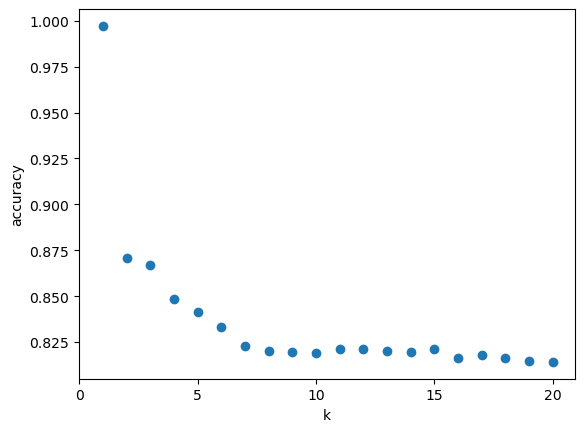

In [50]:
# created a chart to visualization the knn model

k_range = range(1,21)
metrics = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    metrics.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, metrics)
plt.xticks([0,5,10,15,20])
plt.show()

### Logistic Regression

In [63]:
# made a logistic regression model with the train dataset 

logit = LogisticRegression(random_state = 22)

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

accuracy = logit.score(X_train, y_train)

print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2%}')

Accuracy of Logistic Regression classifier on training set: 80.81%


In [52]:
# made a logistic regression model with the validate dataset

logit = LogisticRegression(random_state = 22)

logit.fit(X_val, y_val)

y_pred = logit.predict(X_val)

accuracy = logit.score(X_val, y_val)

print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2%}')

Accuracy of Logistic Regression classifier on training set: 80.28%


### Comparing Models

In [71]:
def model_scores(X_train, y_train, X_val, y_val):
    '''
    Score multiple models on train and validate datasets.
    Print classification reports to look at the best model to test on.
    Returns each different trained model.
    models = decision_tree_model, random_forest_model, knn_model, logistic_regression_model
    '''
    
    decision_tree_model = DecisionTreeClassifier(max_depth = 9, random_state = 22)
    
    random_forest_model = RandomForestClassifier(max_depth = 9, min_samples_leaf = 2, random_state = 22)
    
    knn_model = KNeighborsClassifier(n_neighbors = 11)
    
    logistic_regression_model = LogisticRegression(random_state = 22)
    
    models = [decision_tree_model, random_forest_model, knn_model, logistic_regression_model]
    
# within this for loop I fitted each model, 
# got my actual values and my predicted values for each model
# printed my train and validate score and classification report

    for model in models:
        model.fit(X_train, y_train)
        actual_train = y_train
        predicted_train = model.predict(X_train)
        actual_val = y_val
        predicted_val = model.predict(X_val)
        
        print(model)
        print('\n')
        print('Train Score: ')
        print(classification_report(actual_train, predicted_train))
        print('Validate Score: ')
        print(classification_report(actual_val, predicted_val))
        print('--------------------------------------------------------------')
        print('\n')

    return decision_tree_model, random_forest_model, knn_model, logistic_regression_model



In [73]:
decision_tree_model, random_forest_model, knn_model,logistic_regression_model = model_scores(X_train, y_train, X_val, y_val)

DecisionTreeClassifier(max_depth=9, random_state=22)


Train Score: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3622
           1       0.75      0.69      0.72      1308

    accuracy                           0.86      4930
   macro avg       0.82      0.80      0.81      4930
weighted avg       0.85      0.86      0.85      4930

Validate Score: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1811
           1       0.75      0.67      0.71       654

    accuracy                           0.86      2465
   macro avg       0.82      0.80      0.81      2465
weighted avg       0.85      0.86      0.85      2465

--------------------------------------------------------------


RandomForestClassifier(max_depth=9, min_samples_leaf=2, random_state=22)


Train Score: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      36

### Takeaways on Models

The Decision Tree train accuracy is 85.72%<br>
The Decision Tree validate accuracy is 85.59%

The Random Forest train accuracy is 84.64%<br>
The Random Forest validate accuracy is 84.58%

The K-Nearest Neighbor train accuracy is 82.10%<br>
The K-Nearest Neighbor validate accuracy is 82.10%

The Logistic Regression train accuracy is 80.81%<br>
The Logistic Regression validate accuracy is 80.28%


### The best model to produce both the highest train and validate accuracy is the Decision Tree Model. 

## Test Set Model

In [62]:
# test_model = decision_tree_model.fit(X_test,y_test) don't fit within the test dataset

test_y_pred = decision_tree_model.predict(X_test)

# classification report
print(classification_report(y_test, test_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1811
           1       0.75      0.70      0.72       654

    accuracy                           0.86      2465
   macro avg       0.82      0.81      0.81      2465
weighted avg       0.86      0.86      0.86      2465



## CSV

In [56]:
test_y_pred_prob = decision_tree_model.predict_proba(X_test)

test_y_pred_prob = pd.DataFrame(test_y_pred_prob, columns = ['prob_no_churn', 'prob_of_churn'])


In [57]:
pd.options.display.max_rows = None

test_y_pred_prob

,prob_no_churn,prob_of_churn
0,1.000000,0.000000
1,1.000000,0.000000
2,0.000000,1.000000
3,0.000000,1.000000
4,1.000000,0.000000
5,1.000000,0.000000
6,0.609756,0.390244
7,0.475862,0.524138
8,0.666667,0.333333
9,0.405405,0.594595


In [78]:
reset_test = test.reset_index(drop = True)

test_prob_df = pd.concat([reset_test, test_y_pred_prob], axis=1)

test_prob_df['predicted'] = test_y_pred
test_prob_df.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,prob_no_churn,prob_of_churn,predicted
0,7109-MFBYV,Male,0,No,No,26,Yes,No,No,No,No,No,No,No,No,45.45,1233.15,No,Month-to-month,DSL,Electronic check,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1.000000,0.000000,0
1,9028-LIHRP,Male,0,Yes,Yes,71,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,100.20,7209,No,Two year,Fiber optic,Credit card (automatic),0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1.000000,0.000000,0
2,4290-BSXUX,Male,0,Yes,No,3,Yes,Yes,No,No,No,Yes,No,No,Yes,79.65,251.75,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),0,1,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0.000000,1.000000,1
3,3329-WDIOK,Female,0,No,No,3,No,No phone service,No,Yes,No,No,Yes,Yes,Yes,50.60,155.35,Yes,Month-to-month,DSL,Electronic check,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0.000000,1.000000,1
4,4825-FUREZ,Male,0,Yes,No,42,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,835.5,No,Two year,None,Electronic check,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1.000000,0.000000,0
5,4429-WYGFR,Male,0,No,No,26,Yes,No,No,No,No,Yes,No,No,No,49.15,1237.3,No,Month-to-month,DSL,Bank transfer (automatic),0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1.000000,0.000000,0
6,6654-QGBZZ,Female,0,No,No,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.90,19.9,No,Month-to-month,None,Mailed check,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0.609756,0.390244,0
7,0168-XZKBB,Female,0,Yes,No,19,Yes,Yes,No,No,No,No,Yes,No,Yes,86.85,1564.4,No,Month-to-month,Fiber optic,Electronic check,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0.475862,0.524138,1
8,3748-FVMZZ,Male,0,No,No,4,No,No phone service,No,No,No,Yes,No,Yes,Yes,40.05,162.45,No,Month-to-month,DSL,Electronic check,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0.666667,0.333333,0
9,9898-KZQDZ,Female,1,Yes,Yes,40,Yes,Yes,No,No,No,No,Yes,Yes,Yes,94.55,3640.45,Yes,Month-to-month,Fiber optic,Credit card (automatic),1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0.405405,0.594595,1


In [80]:
df_csv = test_prob_df[['customer_id', 'prob_of_churn', 'predicted']]

df_csv

,customer_id,prob_of_churn,predicted
0,7109-MFBYV,0.000000,0
1,9028-LIHRP,0.000000,0
2,4290-BSXUX,1.000000,1
3,3329-WDIOK,1.000000,1
4,4825-FUREZ,0.000000,0
5,4429-WYGFR,0.000000,0
6,6654-QGBZZ,0.390244,0
7,0168-XZKBB,0.524138,1
8,3748-FVMZZ,0.333333,0
9,9898-KZQDZ,0.594595,1


In [82]:
# transfered a dataframe into a csv file 

df_csv.to_csv('telco_churn_predictions.csv')

## Conclusion

Exploration of Data showed that the following items showed the following features have at least some relationship to churn.

Dependents & Partners
Contract Type
DSL Internet
Whether a customer is a senior citizen


### Takeaways

 - Customers who have dependents and/or partners churned at a much lower rate those those who did not
  
 - The longer the contract a customer had the less likely they were to churn. With month-to-month having the most churned customers.
 
 - Customers who have DSL internet are less likely to churn compared to fiber optic internet customers
 
 - Senior citizens are more likely to churn than non senior citizens.


### Recommendations

We would want to target those who have dependents and/or partners to be our target market. Seeing that customers that have dependents and/or a partner churn at a lower rate, perhaps we could implement promotions that encourage clients to add partners and dependents to account with the added bonus.

I would recommend promoting longer contracts for our customers or figure out why month to month customers are churning at such a high rate.


### Model

The model's performance can be summarized as follows:
Accuracy of 85.72% on in-sample (train), 85.59% on out-of-sample data (validate) and an accuracy of 86% on the test data.


### Next Steps

Following this initial project, I would like to create a more refined model. Whether it is through running different groups of features through my current model, tuning the hyper parameters or both.